In [132]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_columns', None)

In [133]:
paris_l = pd.read_csv('/Users/LPA/Desktop/PROJET DATABIRD/BASE DE DONNÉE PARIS/paris_listings.csv')
paris_r = pd.read_csv('/Users/LPA/Desktop/PROJET DATABIRD/BASE DE DONNÉE PARIS/paris_reviews.csv')

In [134]:
# retirer les dollars du prix
paris_l['price'] = paris_l['price'].str.replace(',', '')
paris_l['price'] = paris_l['price'].str.replace('$', '')
paris_l['price'] = paris_l['price'].astype(float)
paris_l['price']

/var/folders/8s/24fg08w94mg6c8gvgppy178w0000gn/T/ipykernel_53448/605189159.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  paris_l['price'] = paris_l['price'].str.replace('$', '')


0        124.0
1        130.0
2        140.0
3         75.0
4        160.0
         ...  
56721    640.0
56722    538.0
56723    600.0
56724    181.0
56725    300.0
Name: price, Length: 56726, dtype: float64

In [135]:
paris_l_clean = paris_l[['id', 'host_id','host_name', 'host_since', 
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']]
paris_l_clean.head(3) 

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5396,7903,Borzou,2009-02-14,within an hour,100%,99%,f,Saint-Paul - Ile Saint-Louis,1.0,1.0,t,t,"Paris, Ile-de-France, France",Hôtel-de-Ville,48.85247,2.35835,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,"[""Bed linens"", ""Heating"", ""Shower gel"", ""Host ...",124.0,15,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,3,9,12,184,332,45,1,2009-06-30,2023-02-18,4.54,4.58,4.51,4.79,4.83,4.95,4.54,f,1,1,0,0,1.99
1,7397,2626,Franck,2008-08-30,within an hour,100%,67%,t,Le Marais,3.0,9.0,t,t,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,"[""Bed linens"", ""Hangers"", ""Cooking basics"", ""C...",130.0,10,130,4.0,10.0,130.0,130.0,9.7,130.0,t,0,0,0,171,329,30,3,2011-04-08,2023-03-15,4.73,4.80,4.44,4.91,4.88,4.93,4.73,f,2,2,0,0,2.26
2,7964,22155,Anaïs,2009-06-18,NaN,NaN,NaN,f,Gare du Nord - Gare de I'Est,1.0,1.0,t,t,NaN,Opéra,48.87417,2.34245,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Bed linens"", ""Changing table"", ""Heating"", ""P...",140.0,4,365,4.0,4.0,365.0,365.0,4.0,365.0,t,0,0,0,48,6,0,0,2010-05-10,2015-09-14,4.80,5.00,5.00,5.00,5.00,5.00,5.00,f,1,1,0,0,0.04


In [102]:
#Exporter le df clean dans mon dossier
paris_l_clean.to_csv('/Users/blouin/Documents/Python/ProjetFinal/ParisClean.csv',sep=";")

In [138]:
paris_l_clean_short = paris_l_clean.head(15)
paris_l_clean_short

,id,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5396,7903,Borzou,2009-02-14,within an hour,100%,99%,f,Saint-Paul - Ile Saint-Louis,1.0,1.0,t,t,"Paris, Ile-de-France, France",Hôtel-de-Ville,48.85247,2.35835,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,"[""Bed linens"", ""Heating"", ""Shower gel"", ""Host ...",124.0,15,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,3,9,12,184,332,45,1,2009-06-30,2023-02-18,4.54,4.58,4.51,4.79,4.83,4.95,4.54,f,1,1,0,0,1.99
1,7397,2626,Franck,2008-08-30,within an hour,100%,67%,t,Le Marais,3.0,9.0,t,t,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,"[""Bed linens"", ""Hangers"", ""Cooking basics"", ""C...",130.0,10,130,4.0,10.0,130.0,130.0,9.7,130.0,t,0,0,0,171,329,30,3,2011-04-08,2023-03-15,4.73,4.80,4.44,4.91,4.88,4.93,4.73,f,2,2,0,0,2.26
2,7964,22155,Anaïs,2009-06-18,NaN,NaN,NaN,f,Gare du Nord - Gare de I'Est,1.0,1.0,t,t,NaN,Opéra,48.87417,2.34245,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Bed linens"", ""Changing table"", ""Heating"", ""P...",140.0,4,365,4.0,4.0,365.0,365.0,4.0,365.0,t,0,0,0,48,6,0,0,2010-05-10,2015-09-14,4.80,5.00,5.00,5.00,5.00,5.00,5.00,f,1,1,0,0,0.04
3,9359,28422,Bernadette,2009-07-29,NaN,NaN,NaN,f,Châtelet - Les Halles - Beaubourg,2.0,4.0,t,t,NaN,Louvre,48.86006,2.34863,Entire rental unit,Entire home/apt,1,1 bath,1.0,1.0,"[""Heating"", ""Dedicated workspace"", ""Elevator"",...",75.0,180,360,180.0,180.0,360.0,360.0,180.0,360.0,t,0,0,0,264,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,9952,33534,Elisabeth,2009-08-24,within an hour,100%,90%,t,République,1.0,1.0,t,t,"Paris, Ile-de-France, France",Popincourt,48.86373,2.37093,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""First aid kit"", ""Bed linens"", ""Heating"", ""Sh...",160.0,4,31,4.0,4.0,31.0,31.0,4.0,31.0,t,1,9,14,141,43,8,0,2013-03-19,2022-10-21,4.91,4.98,4.86,4.98,4.84,4.88,4.91,f,1,1,0,0,0.35
5,10586,37107,Michael,2009-09-08,within a few hours,100%,83%,f,Montmartre,4.0,5.0,t,t,"Paris, Ile-de-France, France",Buttes-Montmartre,48.88700,2.34531,Entire rental unit,Entire home/apt,2,1 bath,NaN,2.0,"[""TV with standard cable"", ""Heating"", ""Elevato...",80.0,30,300,30.0,30.0,300.0,300.0,30.0,300.0,t,0,0,0,133,50,1,0,2009-12-20,2023-01-31,4.84,4.75,4.75,4.89,4.98,4.61,4.66,f,4,3,1,0,0.31
6,10588,37107,Michael,2009-09-08,within a few hours,100%,83%,f,Montmartre,4.0,5.0,t,t,"Paris, Ile-de-France, France",Buttes-Montmartre,48.88725,2.34518,Entire rental unit,Entire home/apt,2,1 bath,NaN,1.0,"[""Heating"", ""Washer"", ""TV with standard cable""...",75.0,30,300,30.0,30.0,300.0,300.0,30.0,300.0,t,0,0,0,194,22,2,0,2011-03-13,2022-12-16,4.90,4.90,4.85,5.00,4.90,4.65,4.68,f,4,3,1,0,0.15
7,11265,41718,Sylvie,2009-09-28,NaN,NaN,86%,f,Montmartre,1.0,1.0,t,t,"Paris, Île-de-France, France",Buttes-Montmartre,48.88494,2.33997,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Bed linens"", ""Heating"", ""Refrigerator"", ""Fir...",100.0,7,1125,7.0,7.0,1125.0,1125.0,7.0,11

In [148]:
paris_l_clean_short['amenities'].str.replace()

id                                                int64
host_id                                           int64
host_name                                        object
host_since                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_neighbourhood                               object
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood                                    object
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                   

In [139]:

pd.get_dummies(paris_l_clean_short['amenities'])

,"[""Bed linens"", ""Changing table"", ""Heating"", ""Private patio or balcony"", ""Refrigerator"", ""Extra pillows and blankets"", ""Hot water kettle"", ""Dining table"", ""Hot water"", ""Clothing storage: closet"", ""Cleaning products"", ""Dedicated workspace"", ""Coffee maker: french press"", ""Baby bath"", ""Cooking basics"", ""Baking sheet"", ""Microwave"", ""Essentials"", ""Outdoor dining area"", ""Hair dryer"", ""Stove"", ""Wine glasses"", ""Free washer \u2013 In unit"", ""Sun loungers"", ""Room-darkening shades"", ""Outdoor furniture"", ""Pack \u2019n play/Travel crib"", ""Oven"", ""Dishes and silverware"", ""Iron"", ""Kitchen"", ""Children\u2019s books and toys for ages 0-2 years old and 2-5 years old"", ""Free dryer \u2013 In unit"", ""Dishwasher"", ""Hangers"", ""Cleaning available during stay"", ""Bathtub"", ""Freezer"", ""Toaster"", ""TV with standard cable"", ""Drying rack for clothing"", ""Wifi""]","[""Bed linens"", ""Hangers"", ""Cooking basics"", ""Coffee maker"", ""Iron"", ""Wifi"", ""Stove"", ""Host greets you"", ""Refrigerator"", ""TV with standard cable"", ""Smoke alarm"", ""Essentials"", ""Kitchen"", ""Microwave"", ""Hot water"", ""Hair dryer"", ""Oven"", ""Dedicated workspace"", ""Shampoo"", ""Dishes and silverware"", ""Heating"", ""Free washer \u2013 In unit"", ""Extra pillows and blankets"", ""Dryer"", ""Paid parking off premises""]","[""Bed linens"", ""Heating"", ""21\"" HDTV with standard cable"", ""Host greets you"", ""Refrigerator"", ""Extra pillows and blankets"", ""Hot water kettle"", ""Dining table"", ""Hot water"", ""Dedicated workspace"", ""Cooking basics"", ""Microwave"", ""Essentials"", ""Portable fans"", ""Coffee maker"", ""Hair dryer"", ""Wine glasses"", ""Room-darkening shades"", ""Washer \u2013\u00a0In unit"", ""Dishes and silverware"", ""Iron"", ""Smoke alarm"", ""Kitchen"", ""Private entrance"", ""Hangers"", ""Long term stays allowed"", ""Cleaning available during stay"", ""Clothing storage: wardrobe and closet"", ""Drying rack for clothing"", ""Wifi""]","[""Bed linens"", ""Heating"", ""Host greets you"", ""Refrigerator"", ""Hot water"", ""Washer"", ""Cooking basics"", ""Microwave"", ""Essentials"", ""Coffee maker"", ""Hair dryer"", ""Stove"", ""Oven"", ""Dishes and silverware"", ""Iron"", ""Kitchen"", ""Shampoo"", ""Dishwasher"", ""Hangers"", ""Long term stays allowed"", ""TV with standard cable"", ""Smoking allowed"", ""Wifi""]","[""Bed linens"", ""Heating"", ""Refrigerator"", ""Fire extinguisher"", ""Extra pillows and blankets"", ""Hot water"", ""Dedicated workspace"", ""Washer"", ""Cooking basics"", ""Microwave"", ""Essentials"", ""Portable fans"", ""Hair dryer"", ""Stove"", ""Wine glasses"", ""Elevator"", ""Self check-in"", ""Coffee maker: Nespresso, pour-over coffee"", ""Oven"", ""Dishes and silverware"", ""Iron"", ""Smoke alarm"", ""Kitchen"", ""Dishwasher"", ""Carbon monoxide alarm"", ""Hangers"", ""Long term stays allowed"", ""Building staff"", ""Freezer"", ""Toaster"", ""Paid parking off premises"", ""TV with standard cable"", ""Dryer"", ""Wifi""]","[""Bed linens"", ""Heating"", ""Refrigerator"", ""Hot water kettle"", ""Dining table"", ""Hot water"", ""Cleaning products"", ""Clothing storage: dresser"", ""Cooking basics"", ""Microwave"", ""Essentials"", ""Portable fans"", ""Electric stove"", ""Hair dryer"", ""Paid street parking off premises"", ""Wine glasses"", ""Coffee maker: drip coffee maker, Nespresso"", ""Game console"", ""Pack \u2019n play/Travel crib"", ""Oven"", ""Children\u2019s dinnerware"", ""Dishes and silverware"", ""Iron"", ""Smoke alarm"", ""Kitchen"", ""Laundromat nearby"", ""Private entrance"", ""TV"", ""Hangers"", ""Toaster"", ""Wifi""]","[""Bed linens"", ""Heating"", ""Shower gel"", ""Host greets you"", ""Refrigerator"", ""Extra pillows and blankets"", ""Hot water"", ""Cooking basics"", ""Microwave"", ""Essentials"", ""Coffee maker"", ""Body soap"", ""Washer \u2013\u00a0In unit"", ""Oven"", ""Luggage dropoff allowed"", ""Dishes and silverware"", ""Iron"", 

In [6]:
price_per_room_type = paris_l[['room_type', 'price','bedrooms','beds']].groupby("room_type")['price'].mean()
round(price_per_room_type,2)

room_type
Entire home/apt    174.67
Hotel room         327.66
Private room       136.93
Shared room        101.63
Name: price, dtype: float64

In [7]:
price_per_room_type = paris_l[['room_type', 'price','bedrooms','beds']].groupby("room_type")['price'].describe()
round(price_per_room_type,2)

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,48350.0,174.67,627.22,9.0,80.0,115.0,180.0,93000.0
Hotel room,915.0,327.66,244.07,0.0,193.0,260.0,366.5,2205.0
Private room,7172.0,136.93,400.88,8.0,45.0,70.0,139.0,21564.0
Shared room,289.0,101.63,389.07,10.0,30.0,45.0,60.0,5000.0


<AxesSubplot:ylabel='price'>

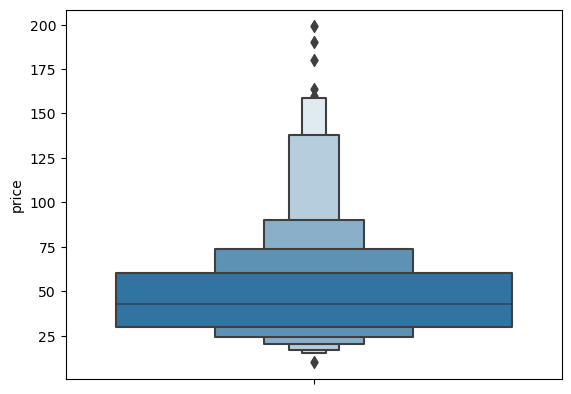

In [8]:
figsize=(12,8)
sns.boxenplot(y='price',data=paris_l[(paris_l['room_type']=='Shared room')&(paris_l['price']<200)])

Shared room : 
Obs 1 - quelques exceptions entre 200 et 1000 sont masquées. 
Obs 2 - majorité des prix qui se situent entre 25 et 100 euros la nuit

In [9]:
price_per_shared_room = paris_l[(paris_l['room_type']=='Shared room')&(paris_l['price']<200)]['price'].describe()
round(price_per_shared_room,2)

count    277.00
mean      49.42
std       29.79
min       10.00
25%       30.00
50%       43.00
75%       60.00
max      199.00
Name: price, dtype: float64

In [10]:
satisfaction_per_shared_room = paris_l[(paris_l['room_type']=='Shared room')&(paris_l['price']>0)]['review_scores_rating'].mean()
satisfaction_per_shared_room 

4.325571428571428

In [11]:
satisfaction_all = paris_l['review_scores_rating'].mean()
satisfaction_all

4.6140148144902176

In [51]:
df = paris_l[(paris_l['room_type']=='Shared room')]
df = df[(df['price']<40)&(df['price']>30)]
df = df[['price','review_scores_rating']]

In [31]:
df.corr(method = "spearman")

,price,review_scores_rating
price,1.000000,0.202637
review_scores_rating,0.202637,1.000000


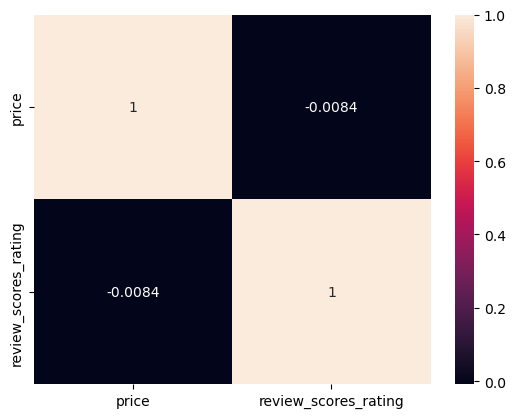

In [52]:
sns.heatmap(df.corr(), annot=True);

In [60]:
df_all = paris_l[['price','review_scores_rating']]
df_all = df_all[(df_all['price']<200)&(df_all['price']>20)]

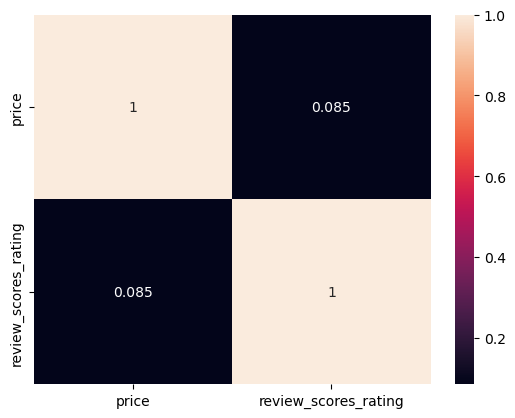

In [61]:
sns.heatmap(df_all.corr(), annot=True);

Il n'y a pas de corrélation entre le prix des chambres et la satisfaction. Il n'y a pas non de corrélation entre les prix des chambres par type de room et la satisfaction du client. 

In [66]:
df = paris_l[(paris_l['room_type']=='Entire home/apt')]
#df = df[(df['price']<40)&(df['price']>30)]
df = df[['price','review_scores_rating']]

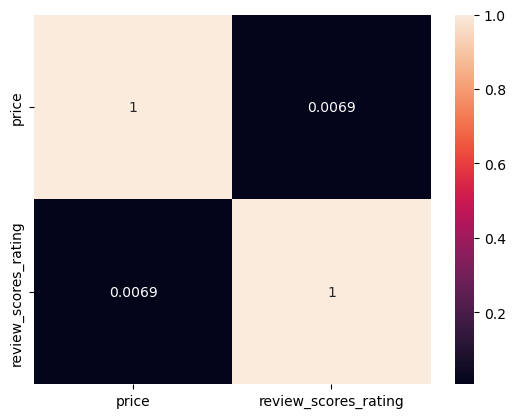

In [67]:
sns.heatmap(df.corr(), annot=True);

In [95]:
df_room = paris_l[['price', 'review_scores_rating', 'room_type']]
df_room['room_type_idx'] = df_room['room_type'].apply(lambda x: 
                                1 if x == 'Entire home/apt' 
                                else 2 if x == 'Hotel room' 
                                else 3 if x == 'Private room' 
                                else 4 if x == 'Shared room' 
                                else None)

/var/folders/8s/24fg08w94mg6c8gvgppy178w0000gn/T/ipykernel_53448/185481388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_room['room_type_idx'] = df_room['room_type'].apply(lambda x:


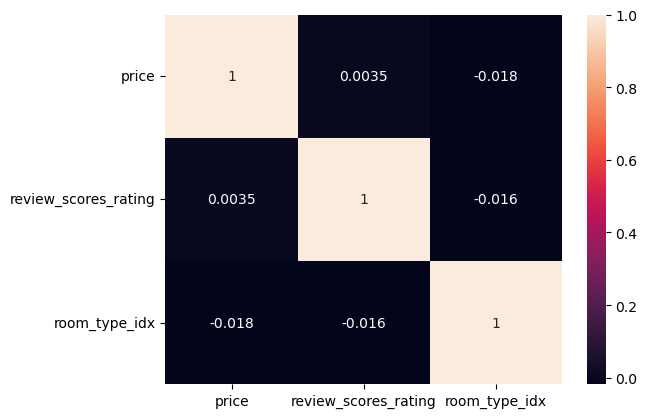

In [96]:
sns.heatmap(df_room.corr(), annot=True);

In [74]:
df_room.corr(method = "spearman")

,price,review_scores_rating
price,1.000000,0.087041
review_scores_rating,0.087041,1.000000


In [76]:
df_room.corr(method = "pearson")

,price,review_scores_rating
price,1.000000,0.003462
review_scores_rating,0.003462,1.000000


In [77]:
df_room.corr(method = "kendall")

,price,review_scores_rating
price,1.000000,0.060798
review_scores_rating,0.060798,1.000000


In [ ]:
df_room['room_type_idx']

### Location avec amenities

In [109]:
wifi = paris_l_clean[paris_l_clean['amenities'].str.contains('Wifi')]
wifi['review_scores_rating'].mean()

4.615080288798261

In [111]:
not_wifi = paris_l_clean[~paris_l_clean['amenities'].str.contains('Wifi')]
not_wifi['review_scores_rating'].mean()

4.603553816974851

In [114]:
wifi.shape, not_wifi.shape

((51433, 56), (5293, 56))

In [127]:
host_greets = paris_l_clean[paris_l_clean['amenities'].str.contains("Host greets you")]
wifi['review_scores_rating'].mean()

4.688977759095131

In [128]:
not_host_greets = paris_l_clean[~paris_l_clean['amenities'].str.contains("Host greets you")]
not_wifi['review_scores_rating'].mean()

4.584116140526747

In [119]:
coffee = paris_l_clean[paris_l_clean['amenities'].str.contains("Coffee maker")]
wifi['review_scores_rating'].mean()

4.688977759095131

In [120]:
not_coffee = paris_l_clean[paris_l_clean['amenities'].str.contains("Coffee maker")]
wifi['review_scores_rating'].mean()

4.688977759095131

In [ ]:
pd.get_dummies(paris_l_clean['amenities'], dtype=float)

In [104]:
paris_l_clean['amenities']=="Host greets you"

0        False
1        False
2        False
3        False
4        False
         ...  
56721    False
56722    False
56723    False
56724    False
56725    False
Name: amenities, Length: 56726, dtype: bool

In [103]:
paris_l_clean['amenities'].unique()

array(['["Bed linens", "Heating", "Shower gel", "Host greets you", "Refrigerator", "Fire extinguisher", "Extra pillows and blankets", "Hot water kettle", "Hot water", "Clothing storage: closet", "Cleaning products", "Dedicated workspace", "Washer", "Cooking basics", "Essentials", "Hair dryer", "Stove", "Body soap", "Oven", "Dishes and silverware", "Smoke alarm", "Kitchen", "Shampoo", "Hangers", "Long term stays allowed", "Toaster", "TV with standard cable", "Drying rack for clothing", "Wifi"]',
       '["Bed linens", "Hangers", "Cooking basics", "Coffee maker", "Iron", "Wifi", "Stove", "Host greets you", "Refrigerator", "TV with standard cable", "Smoke alarm", "Essentials", "Kitchen", "Microwave", "Hot water", "Hair dryer", "Oven", "Dedicated workspace", "Shampoo", "Dishes and silverware", "Heating", "Free washer \\u2013 In unit", "Extra pillows and blankets", "Dryer", "Paid parking off premises"]',
       '["Bed linens", "Changing table", "Heating", "Private patio or balcony", "Refrig